In [2]:
from sec_certs.dataset.fips import FIPSDataset
from sec_certs.dataset.cpe import CPEDataset
from sec_certs.dataset.cve import CVEDataset
from sec_certs.dataset.auxiliary_dataset_handling import CPEDatasetHandler, CVEDatasetHandler
from sec_certs.utils.pandas import expand_df_with_cve_cols
import pandas as pd
import seaborn as sns
import itertools
import functools
import matplotlib.pyplot as plt
from scipy import stats

In [43]:
dset = FIPSDataset.from_web()
# print(f"The loaded FIPSDataset contains {len(dset)} certificates")
# 
# # df = dset.to_pandas()
# 
# dset = FIPSDataset.from_web(path="dset", auxiliary_datasets=True)



Downloading: FIPSDataset:   0%|          | 0.00/64.5M [00:00<?, ?B/s]

In [3]:
df = dset.to_pandas()  # Or you can transform the object into Pandas dataframe
dset.to_json(
    # './FIPS_dataset.json')  # You may want to store the snapshot as json, so that you don't have to download it again
dset = FIPSDataset.from_json('./FIPS_dataset.json')  # you can now load your stored dataset again

In [5]:
# df_openssl = df.loc[~df.pdf_data.isna()]
# 
# dset
# 
# for cert in dset.certs.values():
#     # print(cert.web_data)
#     for item in cert.web_data.tested_conf:
#         
#         # if item == "crypto_library":
#         print(item)
#     print()
    

certs_with_tested_conf = [x for x in dset if x.web_data.tested_conf]

version = 'Red Hat Enterprise Linux 8'

certs_redhat = [x for x in certs_with_tested_conf if any(version in item for item in x.web_data.tested_conf)]


for cert in certs_redhat:
    output = f"{cert.web_data.module_name}, {cert.web_data.sw_versions}, {cert.web_data.date_sunset} " 
    print(output)
    print()

print(len(certs_redhat))  

# df_vulnerable = df.loc[~df.related_cves.isna()]



subset_info = {}



    
# print(df.columns)    
# print(dset.)


# vulnerable_certs = [x for x in dset.certs.values() if x.pdf_data.keywords['crypto_library']]
# print(vulnerable_certs[2])

subset = [x for x in dset if x.pdf_data.keywords['crypto_library']]



Dell BSAFE™ Crypto Module for C, 3.0.1, 2027-02-18 

Red Hat Enterprise Linux 8 GnuTLS Cryptographic Module, rhel8.20210401, 2026-09-21 

Red Hat Enterprise Linux 8 Kernel Cryptographic API, 4.18.0-372.52.1.el8_6; libkcapi 1.2.0-2.el8, 2026-09-18 

SUSE Rancher Kubernetes Cryptographic Library, 853ca1ea1168dff08011e5d42d94609cc0ca2e27, 2026-09-21 

SecureDoc® Cryptographic Engine for macOS/Linux, 8.7, 2026-09-21 

HPE OpenSSL Cryptographic Module on Red Hat Enterprise Linux, rhel8.20231130, 2026-09-21 

Red Hat Enterprise Linux 8 NSS Cryptographic Module, rhel8.20201215, 2026-09-21 

Red Hat Enterprise Linux 8 Kernel Crypto API Cryptographic Module, rhel8.20210302, 2026-09-21 

Spectro Cloud Cryptographic Module, ae223d6138807a13006342edfeef32e813246b39, 2025-07-12 

Red Hat Enterprise Linux 8 OpenSSL Cryptographic Module, rhel8.20231130, 2026-09-21 

Hewlett Packard Enterprise OpenSSL Cryptographic Module on Red Hat Enterprise Linux, rhel8.20210325, 2026-09-21 

Red Hat Enterprise Lin

In [9]:
# not_empty_lib = [x for x in dset if x.pdf_data.keywords['crypto_library']]

not_empty_lib = [x for x in dset if x.pdf_data.keywords.get('crypto_library', None)]

print(len(not_empty_lib))

1022


In [7]:

print(dset.certs)

KeyboardInterrupt: 

In [19]:
print(df.columns)

Index(['cert_id', 'name', 'status', 'standard', 'type', 'level', 'embodiment',
       'date_validation', 'date_sunset', 'algorithms', 'extracted_versions',
       'cpe_matches', 'verified_cpe_matches', 'related_cves',
       'module_directly_referenced_by', 'module_indirectly_referenced_by',
       'module_directly_referencing', 'module_indirectly_referencing',
       'policy_directly_referenced_by', 'policy_indirectly_referenced_by',
       'policy_directly_referencing', 'policy_indirectly_referencing',
       'year_from'],
      dtype='object')


vulnerable_certs[0].heuristics.related_cves={'CVE-2021-2464', 'CVE-2022-21505', 'CVE-2021-3551', 'CVE-2022-21499', 'CVE-2023-22024', 'CVE-2022-21504'}


<Axes: xlabel='year_from'>

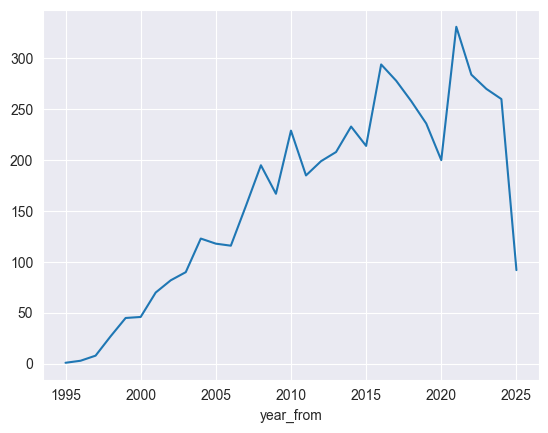

In [14]:
# Get certificates with some CVE
vulnerable_certs = [x for x in dset if x.heuristics.related_cves]

df_vulnerable = df.loc[~df.related_cves.isna()]

# Show CVE ids of some vulnerable certificate
print(f"{vulnerable_certs[1].heuristics.related_cves=}")

# Get certificates from 2015 and newer
df_2015_and_newer = df.loc[df.year_from > 2014]

# Plot distribution of years of certification
df.year_from.value_counts().sort_index().plot.line()

In [27]:
# cisco_certs = [cert for cert in dset if cert.pdf_data.report_keywords.crypto_library]

# print(f"Number of certificates with OpenSSL in library: {len(cisco_certs)}")

years_dict = {}

for cert in dset:
    if cert.pdf_data.keywords not in [None, []]:
        pdf_dict = cert.pdf_data.keywords
        dict_of_libs = pdf_dict['crypto_library']
        
        if "OpenSSL" in dict_of_libs:
            year = cert.web_data.validation_history[0].validation_type
            if years_dict.get(year):
                years_dict[year] += 1
            else:
                years_dict[year] = 1

print(f"Number of certificates with OpenSSL in library: {years_dict}")




# Sort the years for plotting
years = sorted(years_dict.keys())
counts = [years_dict[year] for year in years]

plt.figure(figsize=(18, 5))
plt.bar(years, counts, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Certificates with OpenSSL')
plt.title('Number of Certificates with OpenSSL in Library by Year')
plt.xticks(years)
plt.tight_layout()
plt.show()



KeyError: 'crypto_library'

In [25]:
counter = 0

for cert in dset:
    if cert.pdf_data.keywords not in [None, []]:
        list_of_libs = cert.pdf_data.keywords["crypto_library"]
        if "OpenSSL" in list_of_libs:
            counter += 1

print(f"Number of certificates with OpenSSL in library: {counter}")

KeyError: 'crypto_library'